In [1]:
%pylab inline
import csv
import os, os.path
import seaborn as sns
sns.set_context('talk')

Populating the interactive namespace from numpy and matplotlib


### Loading a folder with matrices screening for sTa
Conditions:
Each file contains an unique sTa
The parameters for sTs and mTs are exactly the same among all repetitions.

In [95]:
def load_metadata(exp_key, prefix = './', print_meta = True):
    '''
    Loads the metadata, which contains all the parameters used for the simulation
    BE CAREFUL: The parameters are set as global variables!!
    If print_meta == True, it prints the values of the imported parameters
    '''
    
    infile =open(prefix+'iexp_'+exp_key+'_meta.csv', mode='r')
    reader = csv.reader(infile)
    meta = list(reader)
    infile.close()
    
    global mTa, sTa, tg, MTs_start, MTs_stop, MTs_step, STs_start, STs_stop, STs_step
    
    mTa = float(meta[0][1])
    sTa = float(meta[1][1])
    tg = float(meta[2][1])
    MTs_start = float(meta[3][1])
    MTs_stop = float(meta[4][1])
    MTs_step = float(meta[5][1])
    STs_start = float(meta[6][1])
    STs_stop = float(meta[7][1])
    STs_step = float(meta[8][1])
    if print_meta:
        print(meta)
    
    return meta

def get_keys(Fnames):
    EXP_KEY = ['']*len(Fnames)
    for i in range(len(Fnames)):
        EXP_KEY[i] = Fnames[i].split('_')[1]
    return EXP_KEY

## Load mutliple experiments

In [84]:
dir_load = './idata/iexp_9/'
meta = load_metadata('901', prefix=dir_load, print_meta=False)

# Get metadata file names in dir_load
F_meta = sorted([name for name in os.listdir(dir_load) if os.path.isfile(os.path.join(dir_load, name)) and name.endswith("csv")])
# Get matrix file names in dir_load
F_npy = sorted([name for name in os.listdir(dir_load) if os.path.isfile(os.path.join(dir_load, name)) and name.endswith("npy")])

# Create the metaMatrix :O using the metadata from the first file
EXP_KEY = get_keys(F_meta)
meta = load_metadata(EXP_KEY[0], prefix=dir_load, print_meta=False)
MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)

# metaMatrix
NNN = np.zeros((len(EXP_KEY), len(MTs), len(STs)))
# STa
STa = np.zeros(len(EXP_KEY))
# Here we assume the same mTa for all of them
for i in range(len(EXP_KEY)):
    meta = load_metadata(EXP_KEY[i], prefix=dir_load, print_meta=False)
    STa[i] = sTa
    NNN[i, :, :] = np.load(dir_load+F_npy[i])

## Load single experiment

In [100]:
dir_load = './'
exp_key = '001'
meta = load_metadata(exp_key=exp_key, prefix=dir_load, print_meta=False)
MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)
NN = np.load(dir_load+'iexp_'+exp_key+".npy")

In [85]:
def plot_heatmap(MTs, STs, MN, mTa, MTs_step, exp_key = None):
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
    plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')
    # ax = sns.heatmap(MN.T/n0, yticklabels=STs, xticklabels=MTs)
    ax = sns.heatmap(MN.T, yticklabels=False, xticklabels=False)
#     plt.locator_params(nbins = 5, tight=)
    plt.vlines(np.where(abs(MTs-mTa) <= MTs_step/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    plt.ylabel('Standard deviation')
    plt.xlabel('Mean lag time')
    plt.title('$t_a=$'+str(mTa))
    if exp_key:
        plt.savefig('./exp_'+exp_key+'_hmap.png')
    a    

## Modify plot heatmap

In [122]:
def plot_heatmap2(MTs, STs, MN, mTa, MTs_step, exp_key = None):

    
    STs_s = [None]*len(STs)
    n_ticks_s = 5
    STs_i = np.arange(len(STs))[0::len(STs)//n_ticks_s]
#     STs_i = np.append(STs_i, len(STs)-1)
    for i in STs_i:
        STs_s[i] = str(np.round(STs[i],2))

    MTs_s = [None]*len(MTs)
    n_ticks_m = 5
    MTs_i = np.arange(len(MTs))[0::len(MTs)//n_ticks_m]
    MTs_i = np.append(MTs_i, len(MTs)-1)
    for i in MTs_i:
        MTs_s[i] = str(np.round(MTs[i],2))
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
    plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')
    ax = sns.heatmap(MN.T, yticklabels=STs_s, xticklabels=MTs_s, cbar_kws={'label': '$N_g/N_0$'})
    # ax = sns.heatmap(MN.T, yticklabels=False, xticklabels=False)
    #     plt.locator_params(nbins = 5, tight=)
    plt.vlines(np.where(abs(MTs-mTa) <= MTs_step/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    ax.tick_params(bottom=False, left=False)
#     ax.locator_params(axis='y', nbins=6)
#     ax.locator_params(axis='x', nbins=10)
    plt.ylabel('$\sigma(T_s)$')
    plt.xlabel('$E(T_s)$')
    plt.title('$t_a=$'+str(mTa))
    # if exp_key:
    #     plt.savefig('./exp_'+exp_key+'_hmap.png')

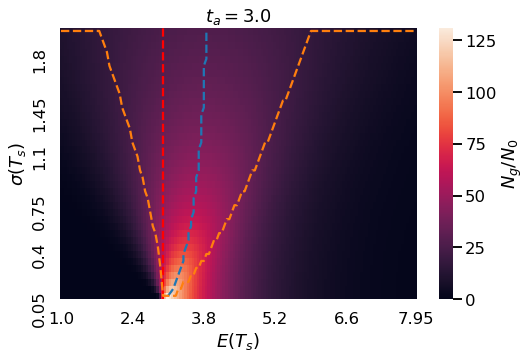

In [123]:
plot_heatmap2(MTs, STs, NN, mTa, MTs_step)

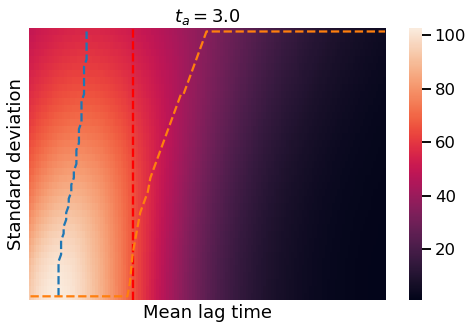

In [62]:
plot_heatmap(MTs, STs[1:], NNN[10,:,1:], mTa, MTs_step)

In [94]:
def get_max_of_max(MTs, STs, MN):
    '''
    Get the numbers associated with the values of parameters that yield the maximum fitness.
    '''

    max_col_ind = np.argmax(np.max(MN, axis = 1))
    max_row_ind = np.argmax(np.max(MN, axis = 0))
    
#     max_MTs_vs_std = np.argmax(MN, axis=0)
#     plt.plot(STs, MTs[max_MTs_vs_std], '-o', label = str(sTa))
    
    mean_max_fit = MTs[max_col_ind] # Mean lag time that yields max fitness
    std_max_fit = STs[max_row_ind] # Std of lag times that yields max fitness
    
    max_fit = MN[max_col_ind, max_row_ind] # Final population that yields max fitness
#     max_fit_var = np.sqrt(VN[max_col_ind, max_row_ind]) # Variance in final population that yields max fitness

    return mean_max_fit, std_max_fit, max_fit

def max_several_exp(NNN, MTs, STs, STa, tg):
    Mean_max_fit, Std_max_fit, Max_fit = np.zeros(len(STa)), np.zeros(len(STa)), np.zeros(len(STa))    
    for i in range(len(STa)):
        Mean_max_fit[i], Std_max_fit[i], Max_fit[i] = get_max_of_max(MTs, STs, NNN[i,:,:])
    return Mean_max_fit, Std_max_fit, Max_fit

In [78]:

Sget_max_of_max(MTs, STs[1:], NNN[0,:,1:])

(3.150000000000002, 0.05, 125.53517644451752)

In [91]:
np.where(STs==0.5)

(array([10]),)

Text(0, 0.5, 'Max. fitness')

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


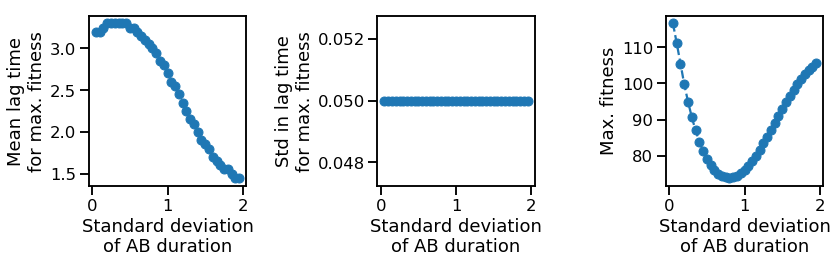

In [104]:
Mean_max_fit, Std_max_fit, Max_fit = max_several_exp(NNN[:,:,1:], MTs, STs[1:], STa, tg)
fig, ax = plt.subplots(1, 3, figsize=(12,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation\nof AB duration')
ax[0].set_ylabel('Mean lag time\nfor max. fitness')

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation\nof AB duration')
ax[1].set_ylabel('Std in lag time\nfor max. fitness')

ax[2].plot(STa, Max_fit, 'o--')
ax[2].set_xlabel('Standard deviation\nof AB duration')
ax[2].set_ylabel('Max. fitness')

In [110]:
min_sTs_ind = 20

Text(0, 0.5, 'Max. fitness')

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


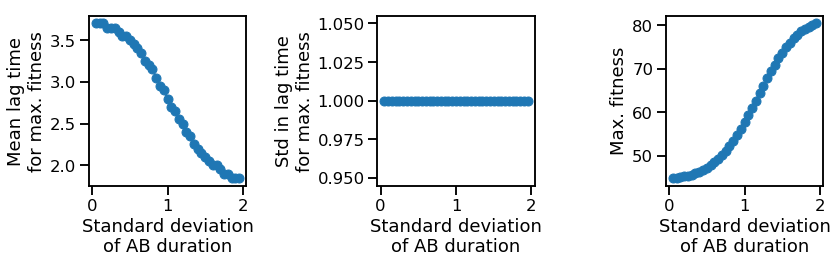

In [111]:
Mean_max_fit, Std_max_fit, Max_fit = max_several_exp(NNN[:,:,min_sTs_ind:], MTs, STs[min_sTs_ind:], STa, tg)
fig, ax = plt.subplots(1, 3, figsize=(12,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation\nof AB duration')
ax[0].set_ylabel('Mean lag time\nfor max. fitness')

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation\nof AB duration')
ax[1].set_ylabel('Std in lag time\nfor max. fitness')

ax[2].plot(STa, Max_fit, 'o--')
ax[2].set_xlabel('Standard deviation\nof AB duration')
ax[2].set_ylabel('Max. fitness')

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation\nof AB duration')
ax[0].set_ylabel('Mean lag time\nfor max. fitness')

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation\nof AB duration')
ax[1].set_ylabel('Std in lag time\nfor max. fitness')

ax[2].plot(STa, Max_fit, 'o--')
ax[2].set_xlabel('Standard deviation\nof AB duration')
ax[2].set_ylabel('Max. fitness')